✅ Total Cost: 1730

✅ Cost per service:
service
BigQuery           255
Cloud Storage      195
Compute Engine    1280
Name: cost, dtype: int64


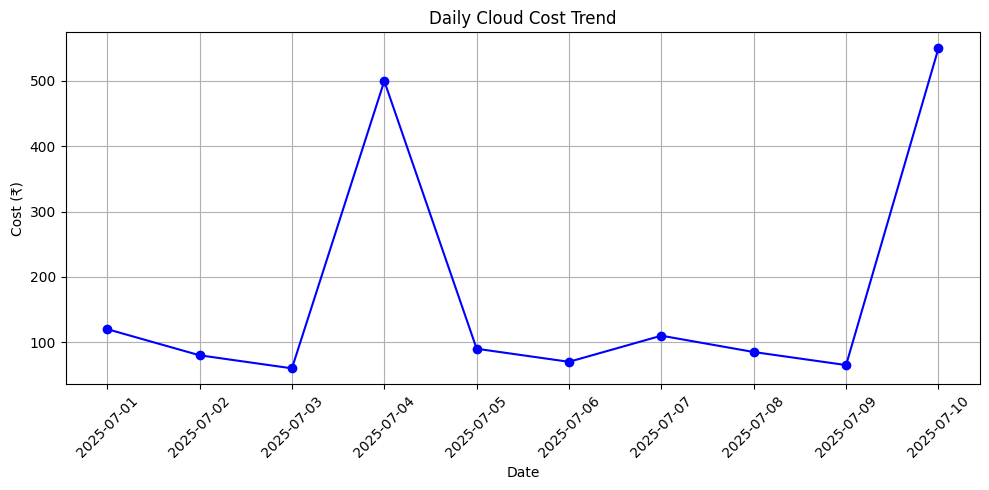

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("billing_data.csv")
df['date'] = pd.to_datetime(df['date'])

# Total cost
print("✅ Total Cost:", df['cost'].sum())

# Service-wise total cost
print("\n✅ Cost per service:")
print(df.groupby('service')['cost'].sum())

# Plot cost over time
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['cost'], marker='o', color='blue')
plt.title("Daily Cloud Cost Trend")
plt.xlabel("Date")
plt.ylabel("Cost (₹)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("cost_trend.png")  # Save graph
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Load data
df = pd.read_csv("billing_data.csv")

# Fit Isolation Forest Model
model = IsolationForest(contamination=0.2, random_state=42)
df['anomaly'] = model.fit_predict(df[['cost']])

# Print anomalies
print("🚨 Detected Anomalies in Cost:")
print(df[df['anomaly'] == -1])


🚨 Detected Anomalies in Cost:
         date         service  cost  anomaly
3  2025-07-04  Compute Engine   500       -1
9  2025-07-10  Compute Engine   550       -1
